# Gradient Descent by hand

## Imports

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
from matplotlib import pyplot as plt, animation
%matplotlib inline

# The following is just for the final animation
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 7, 7
from IPython.display import HTML

## Definitions

#### Define Line

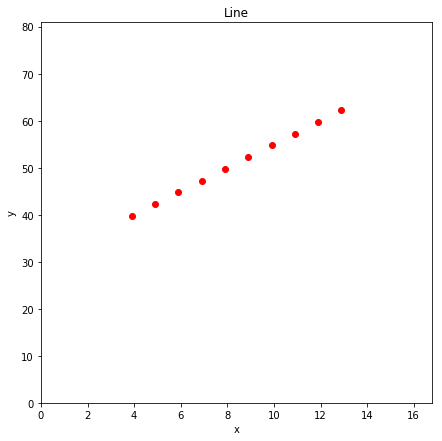

In [8]:
def line(x, a, b):
    return a * x + b

x = np.arange(10).astype(float)
x += np.random.normal(5)

# We will try to guess these values
a = 2.5
b = 30
y = line(x, a, b)

# Visualize our new points (on a slightly larger canvas)
def plot_points():
    plt.plot(x, y, 'ro')
    plt.axis((0, x.max() * 1.3, 0, y.max() * 1.3))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Line')
plot_points()

#### Define loss

In [9]:
# Use mean squared loss https://en.wikipedia.org/wiki/Mean_squared_error
def loss(y, y_pred):
    n = y.shape[0]
    return np.sum(np.square(y - y_pred)) / n

# Test the loss
y_pred = np.arange(10) + 100
loss(y, y_pred)

2882.0503293551164

#### Define derivatives
The partial derivatives show how to change a and b to make the line closer to the initial y.

In [10]:
# Partial derivative of loss wrt a
# d[(y - (a * x + b)) ** 2, a] = 2 * x * (a * x + b - y)
# dyda = 2 * x * (y_pred - y)
# Partial derivative of loss wrt b
# d[(y - (a * x + b)) ** 2, a] = 2 * (a * x + b - y)
# dydb = 2 * (y_pred - y)

#### Define Gradient Descent

In [11]:
def gradient_descent(a, b, x, y, learning_rate=0.01):
    # Prediction of y given current a & b
    y_pred = line(x, a, b)
    # Compute the partial derivatives
    dyda = 2 * x * (y_pred - y)
    dydb = 2 * (y_pred - y)
    # Adjust the predicted a and b
    a = a - dyda.mean() * learning_rate
    b = b - dydb.mean() * learning_rate
    return a, b

## Animate Gradient Descent

In [12]:
# Initial guess for a & b
a_pred = 1
b_pred = 1

In [13]:
# Plot the initial y
fig = plt.figure()
plot_points()
# This is the line we will draw again on each frame
draw_line, = plt.plot(x, line(x, a_pred, b_pred))
plt.close()

# Each fram runs the Gradient Descent for a few step


def animate(frame):
    steps = 15
    global a_pred, b_pred
    for i in range(steps):
        draw_line.set_ydata(line(x, a_pred, b_pred))
        (a_pred, b_pred) = gradient_descent(a_pred, b_pred, x, y)
    return draw_line,

# Compile the animation
anim = animation.FuncAnimation(fig, animate, interval=50)
# Display the animation
anim